Robert Garbutt
Section 101

# Homework 6: Monte Carlo

##### ** Submit this notebook to bCourses to receive a credit for this assignment. **

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_Homework06.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: MC integration [similar to Ayars 6.2, Newman 10.7 ]
<i>10 pts</i>

The “volume” of a 2-sphere $x^2 + y^2 \le r^2$ (a.k.a. a “circle”) is $(1)\pi r^2$. The volume of a 3-sphere $x^2 + y^2 + z^2 \le r^2$ is $4/3 \pi r^3$. The equation for an N-sphere is $x_1^2 +x_2^2 +x_3^2 + ... + x_N^2 \le r^2$ (where $x_i$ are spatial coordinates in $N$ dimensions). We can guess, by induction from the 2-dimensional and 3-dimensional cases, that the “volume” of an N-sphere is $\alpha_N\pi r^N$. Write a function that uses Monte Carlo integration to estimate $\alpha_N$ and its uncertainty for a fixed $N$. Graph $\alpha_N$ with its uncertainty as a function of $N$ for $N=4..10$. 

Determined a_N for N=10: 0.8168290045712173
Error for N=10: 0.5078918050881636
Actual value for N=10 1.5707963267948966


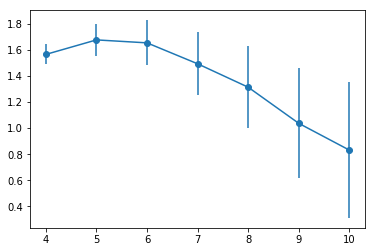

In [93]:
import numpy as np
import matplotlib.pyplot as plt


def distance(array):
    distance = np.sum(np.square(array))
    return np.sqrt(distance)



def Monte_Carlo_Volume_N_Sphere(N,Trials): #Pass N-sphere and number of dart throws
    Within_counter = 0
    Volume_of_N_Cube = 2**N
    
    Coordinates = np.random.rand(N,Trials)
    
    for i in range(0,Trials):
        if distance(Coordinates[:,i]) <= 1: #Takes every coordinate and checks if within N-Ball
            Within_counter += 1
    approx_volume = Within_counter*Volume_of_N_Cube/Trials
    
    a_N = approx_volume/np.pi
    
    return a_N
    

def Uncertainty_of_Approximation(Events,N,Trials): #Events is number of sphere calculations, N and trials are the same as above
                                                   #Function estimates a_N and uncertinaty
        
    Event_Array = [Monte_Carlo_Volume_N_Sphere(N,Trials) for i in range(0,Events)] #Array of Events
    
    Average = np.mean(Event_Array)
    Uncertainty = np.std(Event_Array)
    
    return Average,Uncertainty

N10average, N10uncertainty = Uncertainty_of_Approximation(1000,10,1000) #For Example N=4


print('Determined a_N for N=10:', N10average)
print('Error for N=10:', N10uncertainty)
print('Actual value for N=10', np.pi/2)
    

plt.figure()
x = np.linspace(4,10,7)
y = []
yer = []
for i in x:
    values = Uncertainty_of_Approximation(100,int(i),1000)
    y.append(values[0])
    yer.append(values[1])


plt.scatter(x,y)
plt.errorbar(x,y,yerr=yer)
plt.show()


## Problem 2: Simulating CUORE 
<i>(20 pts)</i>

The <a href="https://cuore.lngs.infn.it/">CUORE experiment</a> at Gran Sasso, Italy, searches for Neutrinoless Double-Beta Decays ($0\nu\beta\beta$) of $^{130}$Te nucleus. Here we will produce some simulated "toy" spectra of what CUORE may see. $0\nu\beta\beta$ events deposit energy in the detector with the mean value of approximately 2530 keV. For the purpose of this simulation, we will assume that the detector response is gaussian with the standard deviation ($\sigma$) of 2 keV. In addition to signal events, there may be some "background" present; for the purpose of this simulation, we will assume that it is uniformly distributed in the region of interest. 

1. Generate an energy spectrum that CUORE might see, assuming N<sub>signal</sub>=100 signal events and N<sub>bkg</sub>=3000 background events uniformly distributed between energies of 2500 and 2600 keV. Can you see a signal peak in a histogram visually ? 

1. To measure the number of signal events, you may try to count the number of events in the window [2525..2535] keV ($\pm 2.5\sigma$) and subtract the <i>expected</i> number of background events in that window (how many?). How many signal events do you measure in your "toy" sample ? 

1. Compute significance of having observed a non-zero number of signal events, i.e. the probability that the number of signal events you measured is consistent with the zero. (<i>Hint:</i> you are testing a null hypothesis that the signal does not exist. In other words, compute the probability of the background fluctuating to the total number of events you observed in the signal window.) 

1. How does the significance depend on the size of the window ? 

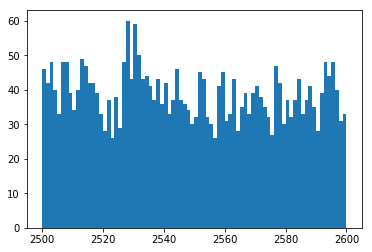

There is a slight signal peak in the region we would expect, but certain generations of the graph yield peaks that look very similar
Number of Expected Background: 465.0
There are approximately 52.0 signal events within the interval (2522.5,2537.5)
Chi-squared value for interval: 6.84123972169513
P-value for interval: 0.008907699973821627
In all cases, the calculated p-values have been around 10^-6 or smaller.  We can thus say there is a very definate deviation  from the uniform distribution


In [160]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats


x = np.random.uniform(low=2500,high=2600,size=3000)
y = np.random.normal(loc=2530,scale=2,size=100)

data = np.concatenate((x,y),axis=0)

plt.figure()
plt.hist(data,bins=80)
plt.show()
print('There is a slight signal peak in the region we would expect, but certain generations of the graph yield peaks that look very similar')

Expected_background = 3100/100*(2537.5-2522.5)    #if uniform we would expect an equal distribution in small subregion, therefore density*length
print('Number of Expected Background:',Expected_background)

Within = 0
for i in data:
    if i > 2522.5 and i<2537.5:
        Within += 1
        
Number_of_Signal_Events = Within - Expected_background

print('There are approximately',Number_of_Signal_Events,'signal events within the interval (2522.5,2537.5)')

chi2,pvalue = scipy.stats.chisquare([Within, 3100-Within],[Expected_background, 3100 - Expected_background])

print('Chi-squared value for interval:',chi2)
print('P-value for interval:',pvalue)
print('In all cases, the calculated p-values have been around 10^-6 or smaller.  We can thus say there is a very definate deviation  from the uniform distribution')



In [177]:
#Part 4

def deviation(window,center):  #Window is the distance between mean and upper/lower point
    expected = 3100/100*window*2
    global data
    Within2 = 0
    for i in data:
        if i > center-window and i< center+window:
            Within2 += 1
            
    Number_of_signal = Within2-expected
    print('There are approximately',Number_of_signal,'signal events within the interval',[(center-window),(center+window)] )
    chi,p = scipy.stats.chisquare([Within2, 3100 - Within2],[expected, 3100 - expected])
    print('Chi-squared value for interval:',chi)
    print('P-value for interval:',p)
    print()
deviation(5,2530)
deviation(6,2530)
deviation(7,2530)
deviation(8,2530)
deviation(10,2530)
deviation(15,2530)
print('Values centered at another point:')
deviation(25,2560)
print('The p-values quickly approach the p-values seen in the last case as the gap barely widens.')

There are approximately 65.0 signal events within the interval [2525, 2535]
Chi-squared value for interval: 15.14336917562724
P-value for interval: 9.964766062180137e-05

There are approximately 67.0 signal events within the interval [2524, 2536]
Chi-squared value for interval: 13.712732160312804
P-value for interval: 0.00021300554015846515

There are approximately 62.0 signal events within the interval [2523, 2537]
Chi-squared value for interval: 10.299003322259136
P-value for interval: 0.0013310207918229386

There are approximately 59.0 signal events within the interval [2522, 2538]
Chi-squared value for interval: 8.354934715821813
P-value for interval: 0.003846412867634768

There are approximately 42.0 signal events within the interval [2520, 2540]
Chi-squared value for interval: 3.556451612903226
P-value for interval: 0.05931440647035468

There are approximately 46.0 signal events within the interval [2515, 2545]
Chi-squared value for interval: 3.2503840245775732
P-value for interv